# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [94]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [95]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    return (x**2) * (numpy.sin(x))

Ensure your function works with numpy arrays:

In [96]:
f(2)

3.637189707302727

In [97]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [98]:
def g(x):
    '''Analytical integral of f(x).'''
    return -1*(x**2)*numpy.cos(x) + 2*x*numpy.sin(x) + 2*numpy.cos(x) - 2

Check your solution with the same numpy array:

In [99]:
assert g(0) == 0.

In [100]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [101]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    return g(xmax) - g(xmin)

Check your analytic function:

In [102]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [110]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    if N%2 ==0:
        N=N
    else: 
        N=N+1
    
        
    D_x=((xmax-xmin)/(3*N))
    
    s= numpy.linspace(xmin,xmax,N+1)
    
    
    SE=SO=0
    
    for i in range (1, N): 
        
        if i%2==0 : 
            SE += f(s[i])
            
        else: 
            SO += f(s[i])
          
                
    return D_x*(f(xmin)+ 4*SO + 2*SE +f(xmax))  

Make sure you have implemented Simpson's rule correctly:

In [111]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [112]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,1,'Log-Log graph to show how the fractional difference between analytically derived and numerically calculated result changes with changing N')

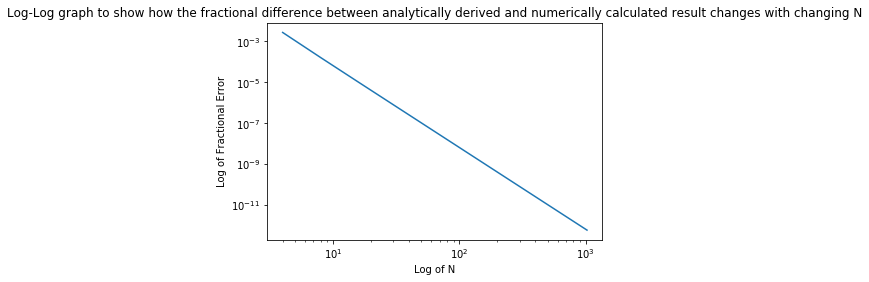

In [135]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over

panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use

result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution

list_result =[]
for i in panel_counts:
    result_numeric = integrate_numeric(x0,x1,i)
    
    list_result.append (result_numeric)
    



y_values = (result_analytic - list_result)/(result_analytic)



x_values = panel_counts



plt.plot((x_values),(y_values))

plt.yscale('log')
plt.xscale('log')
plt.ylabel('Log of Fractional Error')
plt.xlabel('Log of N')
plt.title('Log-Log graph to show how the fractional difference between analytically derived and numerically calculated result changes with changing N')

         


What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

As the number of panels N increases, the fractional error decreases exponentially and so the accuracy of the numerical method increases. If the number of panels is too large, the fractional error is at a minimum as the graph tends to zero. 

If the trapezium rule was being used, how would the panel
count affect accuracy? 

For the trapezium rule as the number of panels increases the accuracy also increases. This is because the error is inversely proportional to the number of panels used. 